Text(0.5, 0, 'm/s')

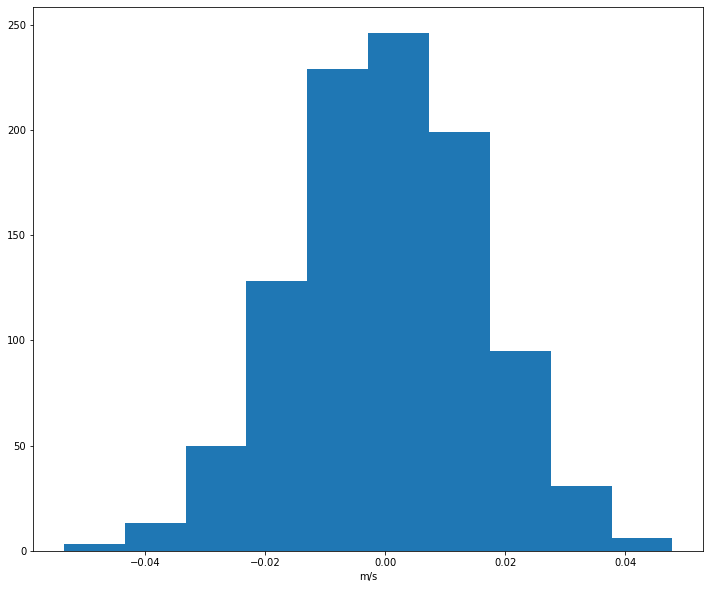

In [1]:
# Determining the velocity distribution of atoms based on the measured temperature

import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp
plt.rcParams['figure.figsize'] = [12,10]
kB=1.38*10**(-23)#Boltzmann constant in m^{2} kg s^{-2} K^{-1} 
T=2.5*10**(-6)# Temperature of the cloud in Kelvin, can change according to experiment 
m=1.44*10**(-25) # in Kg 
#vel = np.linspace(0,0.04,1000)
#PmaxBoltz=(m/(2*np.pi*kB*T))**(1.5)*np.exp(-(m*vel*vel)/(2*kB*T))
#plt.plot(vel,PmaxBoltz)
mu, sigma = 0.0,(kB*T/m)**(0.5)# mean and std. dev.
velMag = np.random.normal(mu, sigma, 1000) #Velocity under free fall 
#print(velMag.max())
plt.hist(velMag)
plt.xlabel('m/s')

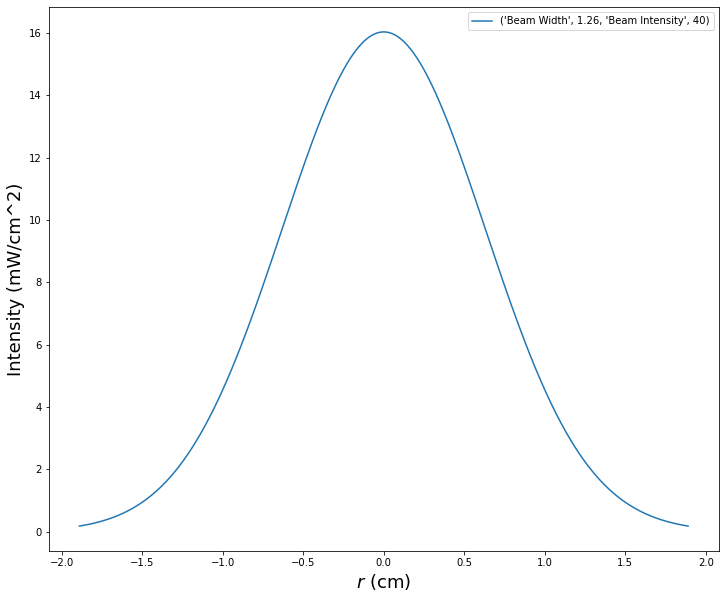

In [2]:
# Calculating Raman beam intensity based on the measured beam width.

from scipy import integrate
#Power of  Gaussian
P=40 # Optical power (mW) for Raman beam can change according to the experiment 
#beam waist for beam 1
w1 = 1.26 # Beam waist (cm) can change according to the experiment
#radial distance from beam centre
r=np.linspace(-1.5*w1,1.5*w1,1001)
#intensity peak for gaussian beam1
Ip1 = 2*P/(np.pi*w1*w1)
Ir1 = Ip1*np.exp(-2*r**2/w1**2)
plt.xlabel(r"$r$ (cm)",fontsize=18)
plt.ylabel(r"Intensity (mW/cm^2)",fontsize=18)
plt.plot(r,Ir1,label=('Beam Width', w1 ,'Beam Intensity', P))
plt.legend()


In [3]:
#saturation intensity
Isat= 1.669 # mW/cm^2, circular polarisation
#linewidth
Gamma = 6.065e6 
#hyperfine splitting
hfs = 6.83468261090e9
#Modulation index for the EOM
beta = 1.068 #Need to get to the source and verify ---
#computing effective Rabi frequency as a local distance z
AG0 = np.sqrt(Ir1/Isat)*Gamma*(mp.besselj(-1,beta)/np.sqrt(2))
AG1 = np.sqrt(Ir1/Isat)*Gamma*(mp.besselj(0,beta)/np.sqrt(2))
AG2 = np.sqrt(Ir1/Isat)*Gamma*(mp.besselj(1,beta)/np.sqrt(2))
AG3 = np.sqrt(Ir1/Isat)*Gamma*(mp.besselj(2,beta)/np.sqrt(2))

In [4]:
# Plotting the EOM spectrum
#print(mp.besselj(0,beta))

In [5]:
AG=np.array([AG0,AG1,AG2,AG3])
#For Rb87
matElemF2=np.array([-np.sqrt(5/24), np.sqrt(1/8)])
matElemF3=np.array([np.sqrt(1/120), np.sqrt(1/8)])
nArr = np.array([-1,0,1])
#Relative frequency of F' excited states with respect to (F'=2 -> F'=3 = 266.650) & (F'=1 -> F'=3 = 423.597) state
relFreqF2 = np.array([423.597,266.65]) #in MHz
#Detuning for Rb87
Delta = -206.09218437 #This is calculated from Differential Stark Shift in another document 
#Effective Rabi Frequency array for Gaussian Beam 1
OmegaEffG1 = 0.0*r.copy() #it's just making an array of same length as r with all elements being 0
#print(len(OmegaEffG1))
for pos in r:
    for i in range(len(nArr)):
        for j in range(len(matElemF3)):
                #Detuning with respect to F'=3 for the F' excited states - Ref: https://doi.org/10.1364/OPTICA.4.001545 (eqn4)
                DeltaF2n=(nArr[i]*hfs+relFreqF2[j]*10**6+Delta*10**6)
                #Equation below is same as eqn 3 of https://doi.org/10.1364/OPTICA.4.001545
                OmegaEffG1[r==pos] = OmegaEffG1[r==pos]+(AG[i][r==pos]*matElemF2[j]*AG[i+1][r==pos]*matElemF3[j])*(1/(2*DeltaF2n))                                        

In [6]:
#Rabi Frequency along the center of beam
OmegaCenter=OmegaEffG1[r==0][0] 
#print(OmegaEffG1[r==0]) #gives an array
#print(OmegaEffG1[r==0][0]) #gives a number

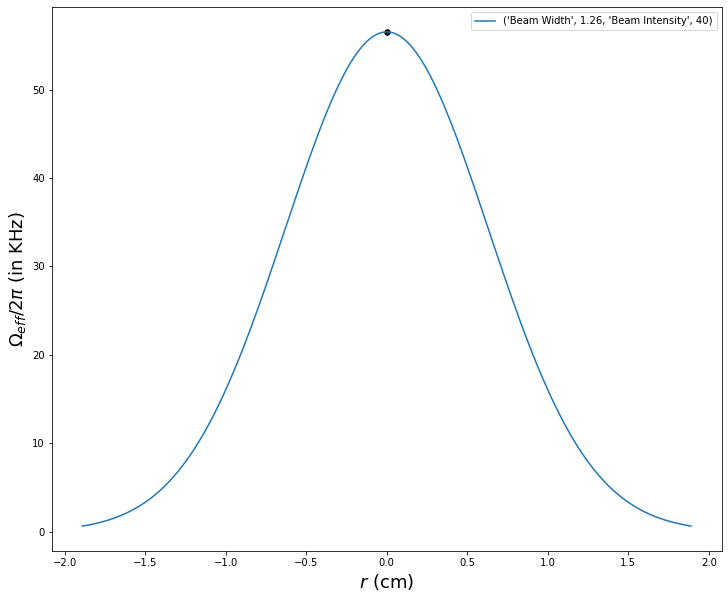

In [7]:
#r is the radial distance from the center of the beam

plt.plot(r,OmegaEffG1/(1000),linestyle='-',label=("Beam Width", w1 , "Beam Intensity", P))
plt.xlabel(r"$r$ (cm)",fontsize=18)
plt.ylabel(r"$\Omega_{eff}/2\pi$ (in KHz)",fontsize=18)
plt.scatter(0,OmegaCenter/1000,marker='o',s=30,color='k')
plt.legend()

In [8]:
#pulse duration corresponding to the average value of rabi frequency corresponding to the Boltzmann dist.
tauAvgG1 = 1/(2*np.mean(OmegaEffG1))
tauPeak = 1/(2*OmegaCenter)
tau = tauPeak
#print(tauAvgG1)
print('The \u03A9 is', OmegaCenter)
print('The \u03C0 pulse length is', tau)

The Ω is 56517.14975525437
The π pulse length is 8.84687218243017e-06


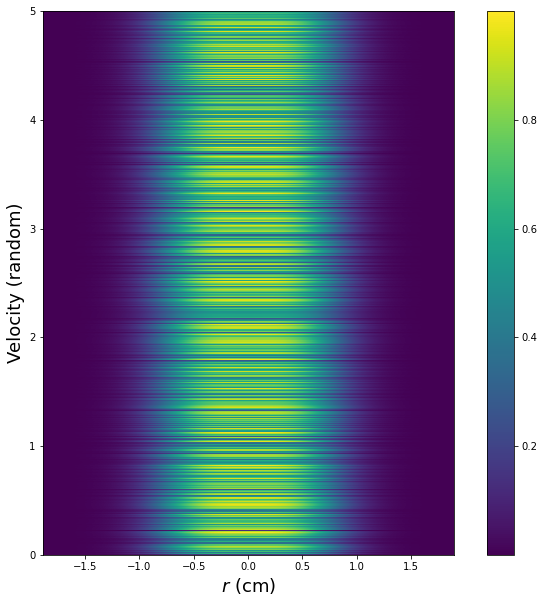

In [9]:
# Calculating transition probability

#pulse duration
#tau = tauAvgG1#7*10**(-6) #in 
#tau = tauPeak
#momentum transfer from laser
k=(4*np.pi/780)*10**(9)
#For Gaussian beam 1
#Modelling transition probabilities for atoms
#mesh grid with position and velocity coords of individual atoms in the cloud
rMesh,velMagMesh = np.meshgrid(r,velMag) 
#plt.imshow(velMagMesh)
#reshaping the Rabi Freq with position array into the shape of the position-momentum mesh grid
OmegaEffG1Mesh,velMagMesh=np.meshgrid(OmegaEffG1,velMag)
#For Gaussian beam 1
OmgG1Mesh = np.sqrt(OmegaEffG1Mesh*OmegaEffG1Mesh+(k*velMagMesh)*(k*velMagMesh))
#OmgG1Mesh = np.sqrt(OmegaEffG1Mesh*OmegaEffG1Mesh)
deltaMesh = k*velMagMesh

#print(np.max(deltaMesh))

#plt.imshow(rMesh)
#plt.imshow(velMagMesh)
#plt.imshow(OmegaEffG1Mesh)
#plt.colorbar()

#probTransG1 = (((OmegaEffG1Mesh*OmegaEffG1Mesh)/(OmgG1Mesh*OmgG1Mesh))*np.sin((tau/2.)*OmgG1Mesh)*np.sin((tau/2.)*OmgG1Mesh))
probTransG1 = ( ((2*np.pi*OmegaEffG1Mesh)**2) / ((2*np.pi*OmegaEffG1Mesh)**2 + deltaMesh**2) ) * ( np.sin( (tau/2) * np.sqrt((2*np.pi*OmegaEffG1Mesh)**2 + deltaMesh**2) )**2 )
#probTransG1 = ( (OmegaEffG1Mesh**2) / (OmegaEffG1Mesh**2 + deltaMesh**2) )

plt.imshow(probTransG1,extent=[np.amin(r), np.amax(r), 0, 5])
plt.colorbar()
plt.xlabel(r"$r$ (cm)",fontsize=18)
plt.ylabel(r"Velocity (random)",fontsize=18)

#plt.plot(r,np.sum(probTransG1[368:634]/266,axis=0),label='Width(1.26cm)') # what is 100:680? Why those values?
#probsum = np.sum(probTransG1[368:634,500])/266
#probsum = np.sum(probTransG1[450:550,500])/100
probsum = np.sum(probTransG1[:,368:634])/(len(probTransG1[500,368:634])*1000)
#print(probsum)
#plt.plot(r,np.sum(probTransG1[368:634,500])/266)
#plt.plot(r,np.sum(probTransG2[100:680]/580,axis=0),label='Width(1.125cm)')
#plt.xlabel(r"$z$(TOF distance in cm)",fontsize=18)
#plt.ylabel(r"P(transition prob.)",fontsize=18)
#plt.legend()
#print(np.amax(probTransG1))
#print(np.amax(deltaMesh))
#print(np.amax(OmegaEffG1Mesh))
#print(len(probTransG1[:,368:634]))

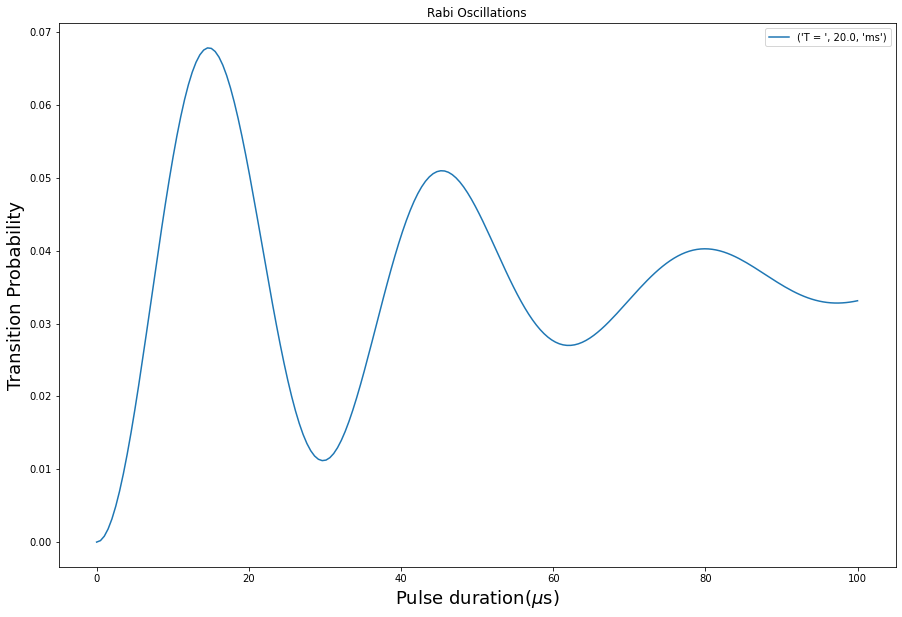

In [10]:
from math import pi, exp, sin, sqrt, atan, erf
#Computing Transition probability as a function of pulse duration after T ms

TOF=20*10**(-3) #Free fall Interrogation time
g = 9.81 # Acceleration towards Gravity 
Gamma_Spon = (1/4)*((Gamma)**3/(DeltaF2n)**2)*(Ip1/Isat)
#Need to update the Raman beam frequecies to compensate for the velocity aquired by the atoms during fall by adding a chirp (e.g 25 MHz/s)
velMagMeshGrav=velMag*velMag/3.+velMag*velMag/3.+(velMag+TOF*g)*(velMag+TOF*g)/3.
#For Gaussian beam 1
OmgG1Mesh = np.sqrt(OmegaCenter*OmegaCenter+(k*velMagMeshGrav)*(k*velMagMeshGrav))
probTransG1 = (((OmegaCenter*OmegaCenter)/(OmgG1Mesh*OmgG1Mesh))*np.sin((tau/2.)*OmgG1Mesh)*np.sin((tau/2.)*OmgG1Mesh))
f, ax = plt.subplots(1, 1, figsize=(15,10))
#tauArr=np.linspace(0.1,500,500)*10**(-6)
tauArr=np.linspace(0,100,200)*10**(-6)
probTransG1Arr=0.0*tauArr
for tau in tauArr:
    probTransG1Arr[tauArr==tau] = np.sum(((OmegaCenter*OmegaCenter)/(OmgG1Mesh*OmgG1Mesh))*np.sin((tau/2.)*OmgG1Mesh)*np.sin((tau/2.)*OmgG1Mesh))*exp(-Gamma_Spon*tau)/len(velMag)
ax.set_title("Rabi Oscillations")
Pmax = np.amax(probTransG1Arr)
ax.plot(tauArr/10**(-6),probTransG1Arr, label=("T = ", TOF/10**(-3),"ms")) 
#ax1.plot(tauArr/10**(-6),probTransG2Arr,linestyle='--',label='width(1.125cm)')
ax.set_xlabel(r"Pulse duration($\mu$s)",fontsize=18)
ax.set_ylabel(r"Transition Probability",fontsize=18)
ax.legend()

0.06787730452314958


Text(0, 0.5, 'Contrast (C)')

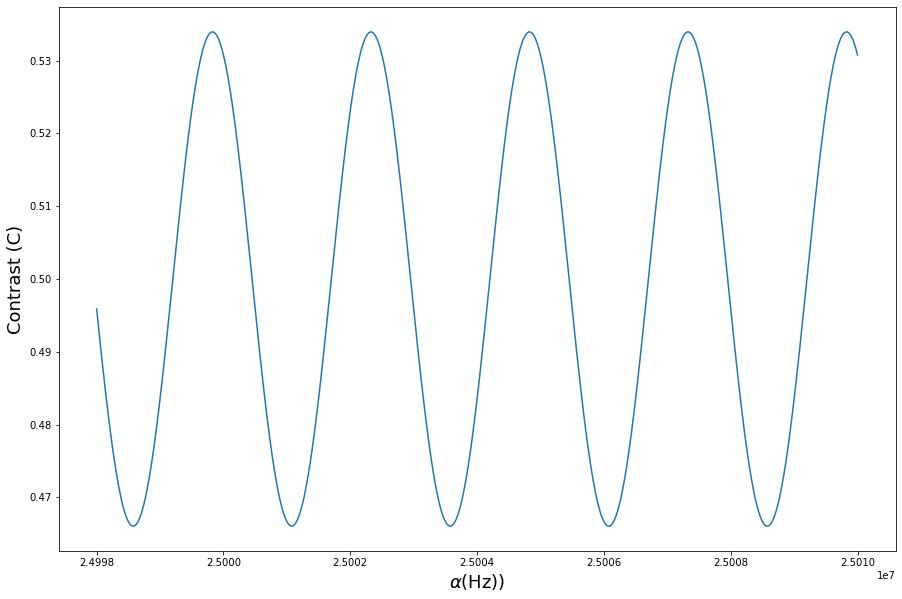

In [11]:
#Proportion of Atoms in F=2 state
print(np.amax(probTransG1Arr))
Pmax = np.amax(probTransG1Arr)
alpha = 25 #is the frequency chirped applied to the raman laser to compensate the doppler effect
k=(4*np.pi/780.241)*10**(9) # Effective wavevector of two photon transition 
C=Pmax #0.22 # C is the contrast of fringes 


#phi = ((k * g) - (2*np.pi*alpha))*(TOF**2) # Interferometric phase shift
#P = 0.5*(1-C*np.cos(phi))
#P1 = 0.5*(1-C*np.cos(((k*g - 2*np.pi*alpha)(TOF)**(2))))


f, ax = plt.subplots(1, 1, figsize=(15,10))
alphArr=np.linspace(24.998,25.01,1000)*10**(6)
ProbInt=0.0*alphArr
for alpha in alphArr:
    #probTransG1Arr[tauArr==tau] = 0.5*(1-C*np.cos(phi*tau))
    phi = ((k * g) - (2*np.pi*alpha))*(TOF**2) #Interferometric phase shift
    ProbInt[alphArr==alpha] = np.sum(0.5*(1-C*np.cos(phi)))#Proportion of Atoms in F=2 state


ax.plot(alphArr,ProbInt,linestyle='-',label='') 
ax.set_xlabel(r"$\alpha$(Hz))",fontsize=18)
ax.set_ylabel(r"Contrast (C)",fontsize=18)
#ax.legend()

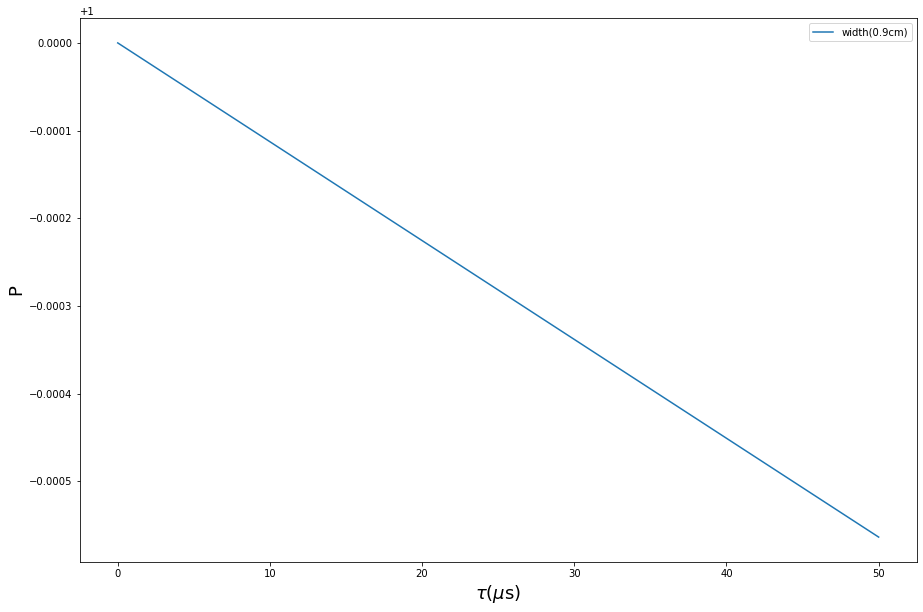

In [12]:
#Spontaneous Emission

Gamma_Spon = (1/4)*((Gamma)**3/(DeltaF2n)**2)*(Ip1/Isat)

f, ax = plt.subplots(1, 1, figsize=(15,10))
tauArr=np.linspace(0,50,200)*10**(-6)
probTransG1Arr=0.0*tauArr
for tau in tauArr:
    probTransG1Arr[tauArr==tau] = exp(-Gamma_Spon*tau)

ax.plot(tauArr/10**(-6),probTransG1Arr,label='width(0.9cm)') 
ax.set_xlabel(r"$\tau$($\mu$s)",fontsize=18)
ax.set_ylabel(r"P",fontsize=18)
ax.legend()

0.611111111111111
7832335.738299699


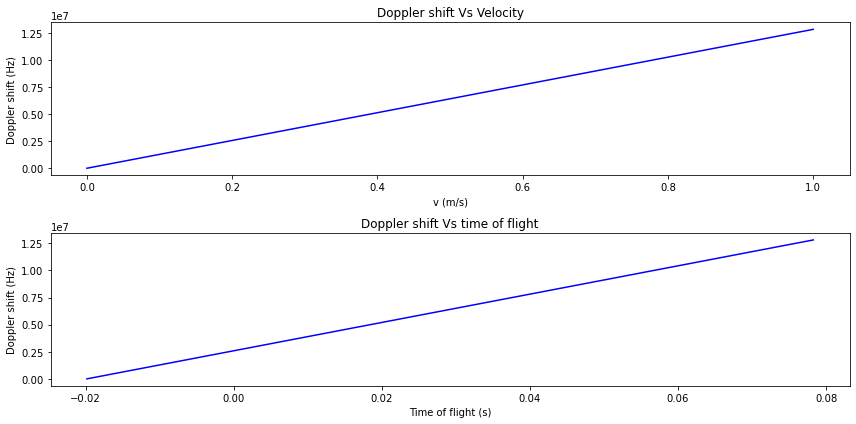

In [13]:
#Deriving the chirp frequency

import numpy as np
import matplotlib.pyplot as plt

px_eff = 5.5e-6/0.36 #px_size/magnification
f0 = (384230406.373 + 78.096) *10e6  #Experiment laser freq

#Rough v calculations
atom_v = 1000*px_eff/(25e-3) #1000px/25ms
vpoints=np.linspace(0,1,100) #in m/s


c = 299792458
f = f0*(vpoints/c)
f_doppler = f0*(atom_v/c)

vzfit = [10.195360195360209, 0.20205915750915665]
tof = (vpoints-vzfit[1])/vzfit[0]


print(atom_v)
#print(vpoints)
#print(f)
print(f_doppler)

plt.figure(figsize=(12,6))

# plt.plot([atom_v,atom_v],[np.min(f),np.max(f)],'--r',linewidth=1)
plt.subplot(2,1,1)
plt.title("Doppler shift Vs Velocity")
plt.xlabel("v (m/s)")
plt.ylabel("Doppler shift (Hz)")
plt.plot(vpoints,f,color="b")

plt.subplot(2,1,2)
plt.title("Doppler shift Vs time of flight")
plt.xlabel("Time of flight (s)")
plt.ylabel("Doppler shift (Hz)")
plt.plot(tof,f,color="b")

plt.tight_layout()
plt.show() 
